In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import scipy as sc
from numpy.lib.stride_tricks import sliding_window_view
import bpmeth
import sympy as sp
import math

In [2]:
from magnet import Enge, spEnge, Magnet

In [3]:
def mavg(x):
    return np.average(sliding_window_view(x, window_shape = 4), axis=1)

In [4]:
data_quad=np.loadtxt("field_map_straight_quad_resol_2mm.txt",skiprows=9)
quad = Magnet(data_quad)

In [5]:
data_cutquad=np.loadtxt("field_map_quad_edge_30deg_resol_2mm.txt",skiprows=9)
cutquad = Magnet(data_cutquad)

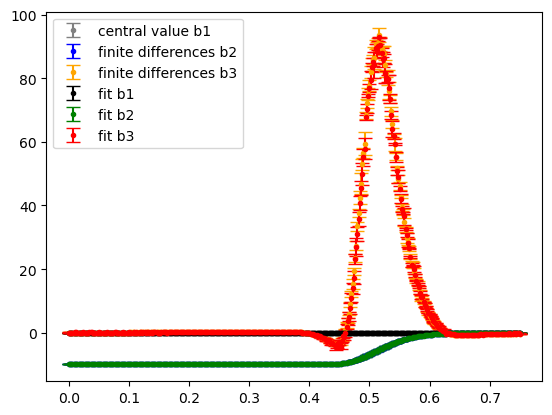

In [6]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b1(z)[0] for z in np.unique(cutquad.src['z'])], yerr=[cutquad.get_b1(z)[1] for z in np.unique(cutquad.src['z'])], label='central value b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b2(z)[0] for z in np.unique(cutquad.src['z']) ], yerr=[ cutquad.get_b2(z)[1] for z in np.unique(cutquad.src['z']) ], label='finite differences b2', ls='', marker='.', color='blue', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b3(z)[0] for z in np.unique(cutquad.src['z']) ], yerr=[ cutquad.get_b3(z)[1] for z in np.unique(cutquad.src['z']) ], label='finite differences b3', ls='', marker='.', color='orange', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='black', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='green', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='red', marker='.', ls='', capsize=5)
ax.legend()

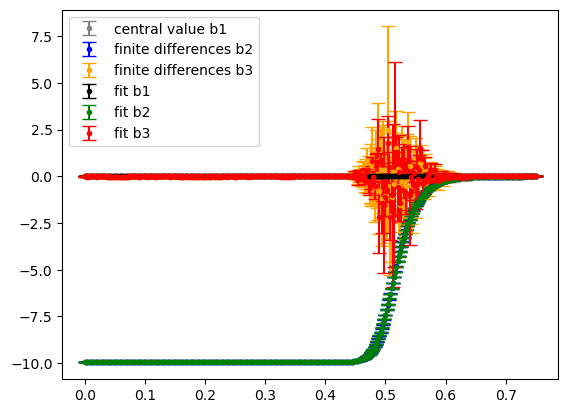

In [7]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(quad.src['z']), [quad.get_b1(z)[0] for z in np.unique(quad.src['z'])], yerr=[quad.get_b1(z)[1] for z in np.unique(quad.src['z'])], label='central value b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), [quad.get_b2(z)[0] for z in np.unique(quad.src['z']) ], yerr=[ quad.get_b2(z)[1] for z in np.unique(quad.src['z']) ], label='finite differences b2', ls='', marker='.', color='blue', capsize=5)
ax.errorbar(np.unique(quad.src['z']), [quad.get_b3(z)[0] for z in np.unique(quad.src['z']) ], yerr=[ quad.get_b3(z)[1] for z in np.unique(quad.src['z']) ], label='finite differences b3', ls='', marker='.', color='orange', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='black', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='green', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='red', marker='.', ls='', capsize=5)
ax.legend()

In [8]:
integrated_b1 = np.trapezoid([cutquad.get_b1(z)[0] for z in np.unique(quad.src['z'])])
integrated_b2 = np.trapezoid([cutquad.get_b2(z)[0] for z in np.unique(quad.src['z'])])
integrated_b3 = np.trapezoid([cutquad.get_b3(z)[0] for z in np.unique(quad.src['z'])])
print(f"Integrated b1: {integrated_b1}")
print(f"Integrated b2: {integrated_b2}")
print(f"Integrated b3: {integrated_b3}")
xtest=0.025
print(f"Integrated effect at x={xtest}: {integrated_b1}")
print(f"Integrated effect at x={xtest}: {integrated_b2*xtest}")
print(f"Integrated effect at x={xtest}: {integrated_b3*xtest**2/2.0}")

Integrated b1: 4.867213763430696
Integrated b2: -2611.5126984333297
Integrated b3: 3124.5094476226955
Integrated effect at x=0.025: 4.867213763430696
Integrated effect at x=0.025: -65.28781746083324
Integrated effect at x=0.025: 0.9764092023820925


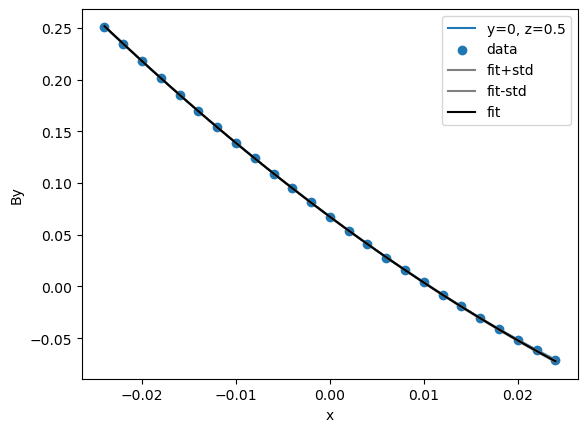

In [9]:
fig, ax = plt.subplots()
coeffs, coeffsstd = cutquad.fit_xprofile(0, 0.5, "By", 2, ax=ax, xmax=0.025)

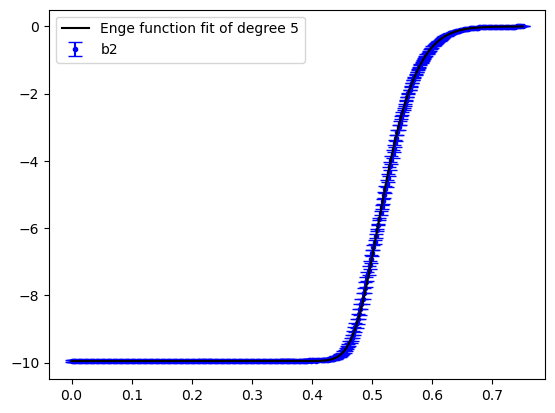

In [10]:
params, cov = cutquad.fit_b2_enge()

np.float64(0.5247858492719366)

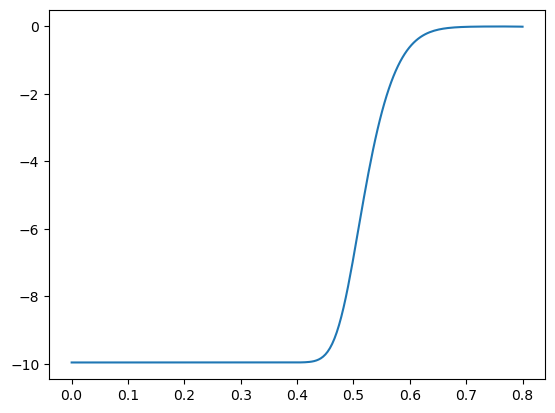

In [11]:
ss = np.linspace(0, 0.8, 200)
plt.plot(ss, Enge(ss, *params), label='enge fit')
sedge = np.trapezoid(Enge(ss, *params), x=ss) / params[0]
sedge


In [12]:
s = sp.symbols('s')
sp.exp(s)
sp.Poly(params[1:], s).diff(s)

Poly(-14631.6460472137*s**3 + 26708.4061425491*s**2 - 16152.2116171943*s + 3271.81392715437, s, domain='RR')

Cutting magnet at angle -0.5235987755982988...


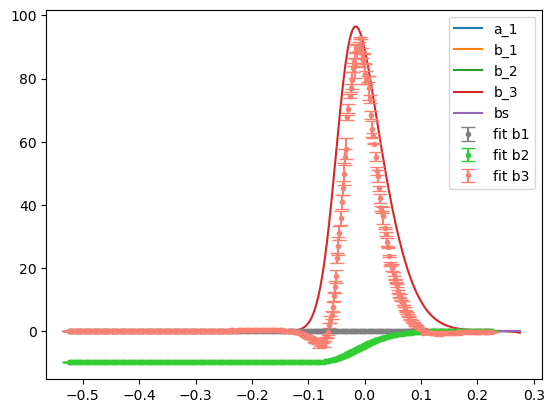

In [16]:
s = sp.symbols('s')
b2 = sp.Function('b2')
quadfringe = bpmeth.FieldExpansion(b=("0", b2(s)))

cut_quadfringe = quadfringe.cut_at_angle(-30/180*np.pi)

# Rotated model still to add, quadrupole measured at 30 degrees

# Substitute b2 with actual profile
cut_enge_quadfringe = bpmeth.FieldExpansion(b=[cut_quadfringe.b[i].replace(b2, lambda s : spEnge(s+sedge, *params)).doit() for i in range(3)])

fig, ax = plt.subplots()
cut_enge_quadfringe.plot_components(smin=0-sedge, smax=0.8-sedge, ns=200, ax=ax)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='limegreen', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='salmon', marker='.', ls='', capsize=5)
plt.legend()


In [14]:
x = np.linspace(-0.025, 0.025, 50)
y = 0
s = np.linspace(0, 0.8, 200)

X, Y, S = np.meshgrid(x, y, s)

Xrot = X*np.cos(-30/180*np.pi) - S*np.sin(-30/180*np.pi)
Srot = X*np.sin(-30/180*np.pi) + S*np.cos(-30/180*np.pi)

# Bx = cutquad.interpolate_points(Xrot, Y, Srot, 'Bx')
# By = cutquad.interpolate_points(Xrot, Y, Srot, 'By')
# Bz = cutquad.interpolate_points(Xrot, Y, Srot, 'Bz')


In [15]:
data = np.array(X.flatten(), Y.flatten(), S.flatten(), Bx.flatten(), By.flatten(), Bz.flatten()).T

NameError: name 'Bx' is not defined